## Data Wrangling of 'WeRateDogs' by Ashish

### Introduction

This a Dataset from Twitter Handle dog_rates, also known as 'WeRateDogs'. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

The goal of the project is to wrangle 'WeRateDogs' Twitter data to create interesting and trustworthy analyses and visualizations.

### Gather Data:

In [8]:
#Import all required Packages,

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import os

In [9]:
#Read the CSV file,

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding='ISO-8859-1')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
#Download programmatically tweet image predictions'image_predictions'

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
    
with open(os.path.join(folder_name,
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [10]:
#Open 'image_predictions' file,

image_predictions = pd.read_csv('image_predictions/image-predictions.tsv',
                       sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file

In [5]:
auth = tweepy.OAuthHandler('RmCEjjTm44ba4DrYMUGkWR1us', 'OXcjrlIUt1a4dhBTl4cRiKs6gAjjVGy48Y1coqAWkTotDQS2QY')
auth.set_access_token('148248669-QhAD5hNcusdFmUqiEIu98CCDpttmZsAjFdsWLQPf', 'IaxODiXztK7b6k6tAHF9ezhY6ftrEluPLdNNbA0Y8kxig')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [6]:
#To download all tweets based on Tweet ID and store in list,
df_list = []
#To download all tweets based on Tweet ID and store in list which are not found,
exception_list = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        df_list.append(api.get_status(tweet_id))
    except Exception as e:
        exception_list.append(tweet_id)

Rate limit reached. Sleeping for: 305
Rate limit reached. Sleeping for: 725
Rate limit reached. Sleeping for: 723


In [7]:
print("Total no of Tweets found are" ,len(df_list))
print("Total no of Tweets not found are" , len(exception_list))

Total no of Tweets found are 2345
Total no of Tweets not found are 11


In [14]:
#Adding them to Dictionary

df_dicts = []
for each_tweet in df_list:
    df_dicts.append(each_tweet)

In [15]:
#Writing dictionary into to a text file

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(df_dicts,
                              indent=4))

In [11]:
#Put data into dataframe,
#And choosing only required coloumns

data_df = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    whole_raw_tweet = json.load(json_file)
    for tweet in whole_raw_tweet:
        tweet_id = tweet['id']
        whole_tweet = tweet['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        followers_count = tweet['user']['followers_count']
        friends_count = tweet['user']['friends_count']
        whole_source = tweet['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = tweet['retweeted_status'] = tweet.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        data_df.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })

In [12]:
df_tweet = pd.DataFrame(data_df, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [19]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 8 columns):
tweet_id            2345 non-null object
favorite_count      2345 non-null int64
retweet_count       2345 non-null int64
followers_count     2345 non-null int64
friends_count       2345 non-null int64
source              2345 non-null object
retweeted_status    2345 non-null object
url                 2345 non-null object
dtypes: int64(4), object(4)
memory usage: 146.6+ KB


### Asses Data:

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.

#### Visual Assesment

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
df_tweet

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,38787,8584,6882817,8,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33223,6308,6882817,8,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,25022,4187,6882817,8,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,42153,8706,6882817,8,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,40329,9470,6882817,8,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,20217,3137,6882817,8,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11853,2088,6882817,8,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,65515,19028,6882817,8,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,27774,4293,6882817,8,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,31935,7467,6882817,8,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


#### Programmatic Assesment

In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [9]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Daisy          7
an             7
Bailey         7
Buddy          7
Rusty          6
Leo            6
Bella          6
Jax            6
Scout          6
Milo           6
Jack           6
Dave           6
Oscar          6
Stanley        6
Koda           6
Louis          5
            ... 
Kathmandu      1
Vinnie         1
Brian          1
Tyrus          1
Gunner         1
Amber          1
Alejandro      1
Strudel        1
Ralf           1
Beebop         1
Diogi          1
light          1
Jonah          1
Tayzie         1
Chadrick       1
Berb           1
Laela          1
Grizzwald      1
Kanu           1
Ronnie         1
Dobby          1
Tobi           1
Tango          1
Stuart         1
Brady          1
Roscoe         1
Jaspers        1
life          

In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [82]:
sum(image_predictions['jpg_url'].duplicated())

66

In [12]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 8 columns):
tweet_id            2345 non-null object
favorite_count      2345 non-null int64
retweet_count       2345 non-null int64
followers_count     2345 non-null int64
friends_count       2345 non-null int64
source              2345 non-null object
retweeted_status    2345 non-null object
url                 2345 non-null object
dtypes: int64(4), object(4)
memory usage: 146.6+ KB


#### Quality Issues:

###### 'twitter_archive' Table

* Ignore all Retweeted Tweets(Keeping Original only)
* Ignore all Tweets without images
* Drop the coloumns which is not to be used in analysis
* 'Timestamp' column should be a datetime object.
* The 'numerator' and 'denominator' need to be converted to float values

###### 'image_predictions' Table

* Make upper case for the each word of the 'p1', 'p2', 'p3' coloumns
* Remove '-' between the words
* Delete duplicate 'jpg_url'
* Drop the coloumns which is not to be used in analysis

###### 'df_tweet' Table

* Keep only original Tweets 

#### Tidiness Issues:

* Melt different stages of dogs into one coloumn 'stages_of_dog'
* Condense the coloumns predicting the breeds of the dogs
* Change 'tweet_id' of df_tweet to int. So that it can be merged with other two df
* Merge all the tables into dataframe 'twitter_archive_master'

### Cleaning Data:

In [14]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_tweet_clean = df_tweet.copy()

##### Define:

##### Quality- 'twitter_archive' - Ignore all Retweeted Tweets

According to the info there are 181 such records which need to be removed as they are not original tweets. When 'twitter_archive' and 'image_predictions' will be merged then records not having images will be omitted.

In [15]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
#Code:

twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_id'])]

In [17]:
#Test:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

##### Define:

##### Quality- 'twitter_archive' - Drop the coloumns which is not to be used in analysis

In [18]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [19]:
#Code:

twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'source',
                                                    'expanded_urls',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id',
                                                    'retweeted_status_timestamp'], 1)

In [20]:
#Test:

list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### Define:

##### Quality- 'twitter_archive'- 'Timestamp' column should be a datetime object

And it should be bifurcated into 'day', 'month', 'year' coloumns. After that 'Timestamp' would be droped.

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


In [22]:
#Code:

#converting to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [23]:
#Test:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


In [24]:
#Code:

#extract into 'day', 'month', 'year' coloumns
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year

In [25]:
#Test:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'day',
 'month',
 'year']

In [26]:
#drop 'timestamp' coloumn
twitter_archive_clean = twitter_archive_clean.drop(['timestamp'], 1)

In [27]:
#Test:
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'day',
 'month',
 'year']

##### Define:

##### Quality- 'twitter_archive'- The 'numerator' and 'denominator'  need to be converted to float values. 

In [28]:
#Code:

twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

In [29]:
#Test:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
day                   2175 non-null int64
month                 2175 non-null int64
year                  2175 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 220.9+ KB


#### Extract Dog Rates and Dog Count

In [30]:
import re

rates = []

#raw_rates = lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0))

twitter_archive_clean['text'].apply(lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0)))

rating = []
dog_count = []

for item in rates:
    
    # for tweets with no rating, but a picture, so a dog_count of 1
    if len(item) == 0:
        rating.append('NaN')
        dog_count.append(1)
        
    # for tweets with single rating and dog_count of 1
    elif len(item) == 1 and item[0][-1] == '10':
        rating.append(float(item[0][0]))
        dog_count.append(1)
   
    # for multiple ratings
    elif len(item) == 1: 
        a = float(item[0][0]) / (float(item[0][-1]) / 10) 
        rating.append(a)
        dog_count.append(float(item[0][-1]) / 10)
   
    # for tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        r = []
        for i in range(len(item)):
            if item[i][-1] == '10': #one tweet has the phrase '50/50' so I'm coding to exclude it
                r.append(item[i])
        for rate in r:
            total = total + float(rate[0])
        a = total / len(item)
        rating.append(a)
        dog_count.append(len(item))
   
    # if any error has occurred
    else:
        rating.append('Not parsed')
        dog_count.append('Not parsed') 
        
twitter_archive_clean['rating'] = rating
twitter_archive_clean['dog_count'] = dog_count
twitter_archive_clean['rating'].value_counts()

12.0                 503
10.0                 434
11.0                 428
13.0                 307
9.0                  157
8.0                   97
7.0                   54
14.0                  44
6.0                   32
5.0                   32
3.0                   19
4.0                   14
2.0                   10
1.0                    7
9.5                    4
8.5                    4
7.5                    3
NaN                    3
6.5                    3
5.5                    2
15.0                   2
10.5                   2
420.0                  2
0.0                    2
1776.0                 1
9.75                   1
9.666666666666666      1
4.5                    1
11.27                  1
13.5                   1
666.0                  1
182.0                  1
11.5                   1
11.26                  1
Name: rating, dtype: int64

In [31]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating'].astype(float)

##### Define:

##### Tidiness - 'twitter_archive'- Melt different stages of dogs into one coloumn 'stages_of_dog'. Then drop 'dogs' from the dataframe and Sort by stages_of_dog in order to then drop duplicated based on tweet_id except for the last occurrence.

In [32]:
#Code:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'day',
                                                                'month',
                                                                'year',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name',
                                                                'rating',
                                                                'dog_count'],
                               var_name='dogs', value_name='stages_of_dog')

#drop 'dogs'
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

#Sorting:
twitter_archive_clean = twitter_archive_clean.sort_values('stages_of_dog').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [33]:
#Test:
twitter_archive_clean['stages_of_dog'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: stages_of_dog, dtype: int64

##### Define:

##### Quality - 'image_predictions' - Make upper case for the each word of the 'p1', 'p2', 'p3' coloumns and Remove '-' between the words

In [34]:
#Code: Make upper case for the each word of the 'p1', 'p2', 'p3' coloumns

image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()

#Code: Remove '-' between the words

image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

In [35]:
#Test:

image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define:

##### Quality - 'image_predictions' - Delete duplicate 'jpg_url'

In [36]:
#Code:

image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [37]:
#Test:
sum(image_predictions_clean['jpg_url'].duplicated())

0

##### Define:

##### Tidiness - 'image_predictions' - Condense the coloumns predicting the breeds of the dogs

Create one column for image prediction 'dog_type_pred' and one column for confidence level 'dog_conf'

In [38]:
#Code:

dog_type_pred = []
dog_conf= []

def breed_dogs(row):
    if row['p1_dog']:
        dog_type_pred.append(row['p1'])
        dog_conf.append(row['p1_conf'])
    elif row['p2_dog']:
        dog_type_pred.append(row['p2'])
        dog_conf.append(row['p2_conf'])
    elif row['p3_dog']:
        dog_type_pred.append(row['p3'])
        dog_conf.append(row['p3_conf'])
    else:
        dog_type_pred.append('Error')
        dog_conf.append('Error')
        
image_predictions_clean.apply(breed_dogs, axis = 1)

#new columns,

image_predictions_clean['dog_type_pred'] = dog_type_pred
image_predictions_clean['dog_conf'] = dog_conf

In [39]:
#drop rows that has prediction_list as 'error'
image_predictions_clean = image_predictions_clean[image_predictions_clean['dog_type_pred'] != 'Error']

#Test: 
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id         1691 non-null int64
jpg_url          1691 non-null object
img_num          1691 non-null int64
p1               1691 non-null object
p1_conf          1691 non-null float64
p1_dog           1691 non-null bool
p2               1691 non-null object
p2_conf          1691 non-null float64
p2_dog           1691 non-null bool
p3               1691 non-null object
p3_conf          1691 non-null float64
p3_dog           1691 non-null bool
dog_type_pred    1691 non-null object
dog_conf         1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [40]:
#Drop the coloumns which is not to be used in analysis

image_predictions_clean = image_predictions_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#Test:
list(image_predictions_clean)

['tweet_id', 'jpg_url', 'dog_type_pred', 'dog_conf']

##### Define:

##### Quality - df_tweet - Keep only original Tweets

In [41]:
#Code:
df_tweet_clean  = df_tweet_clean[df_tweet_clean['retweeted_status'] == 'Original tweet']

#Test:
df_tweet_clean['retweeted_status'].value_counts()

Original tweet    2175
Name: retweeted_status, dtype: int64

##### Define:

##### Tidiness - df_tweet - Change 'tweet_id' of df_tweet to int. So that it can be merged with other two df

In [42]:
#Code:
df_tweet_clean['tweet_id'] = df_tweet_clean['tweet_id'].astype(int)

#Test:
df_tweet_clean['tweet_id'].dtypes

dtype('int64')

##### Define:

##### Tidiness - Merge all the tables into dataframe 'twitter_archive_master'

In [43]:
#Code: merge twitter_archive_clean and image_predictions_clean into df_twitter_1 df

df_twitter_1 = pd.merge(twitter_archive_clean, 
                      image_predictions_clean, 
                      how = 'left', on = ['tweet_id'])

#Ignore all Tweets without images('jpg_url')
df_twitter_1 = df_twitter_1[df_twitter_1['jpg_url'].notnull()]

#Test:
df_twitter_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2174
Data columns (total 14 columns):
tweet_id              1626 non-null int64
day                   1626 non-null int64
month                 1626 non-null int64
year                  1626 non-null int64
text                  1626 non-null object
rating_numerator      1626 non-null float64
rating_denominator    1626 non-null float64
name                  1626 non-null object
rating                1625 non-null float64
dog_count             1626 non-null float64
stages_of_dog         1626 non-null object
jpg_url               1626 non-null object
dog_type_pred         1626 non-null object
dog_conf              1626 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 190.5+ KB


In [44]:
#Code: merge df_twitter_1 and df_tweet_clean into df_twitter_2
df_twitter_2 = pd.merge(df_twitter_1, df_tweet_clean, 
                      how = 'left', on = ['tweet_id'])

#Test:
df_twitter_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 21 columns):
tweet_id              1626 non-null int64
day                   1626 non-null int64
month                 1626 non-null int64
year                  1626 non-null int64
text                  1626 non-null object
rating_numerator      1626 non-null float64
rating_denominator    1626 non-null float64
name                  1626 non-null object
rating                1625 non-null float64
dog_count             1626 non-null float64
stages_of_dog         1626 non-null object
jpg_url               1626 non-null object
dog_type_pred         1626 non-null object
dog_conf              1626 non-null object
favorite_count        1626 non-null int64
retweet_count         1626 non-null int64
followers_count       1626 non-null int64
friends_count         1626 non-null int64
source                1626 non-null object
retweeted_status      1626 non-null object
url                   1626 non-null o

### Storing, Analyzing, and Visualizing Data

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv.

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [45]:
#Saving clean df into csv file,
df_twitter_2.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

#### Insights and Visualizations (1):

'Golden Retriever' is the most common breed is this dataset.

In [46]:
df_twitter_2['dog_type_pred'].value_counts()

Golden Retriever                  143
Labrador Retriever                103
Pembroke                           94
Chihuahua                          87
Pug                                60
Toy Poodle                         50
Chow                               45
Pomeranian                         42
Samoyed                            38
Malamute                           32
Chesapeake Bay Retriever           31
French Bulldog                     30
Cocker Spaniel                     26
Miniature Pinscher                 24
Eskimo Dog                         22
German Shepherd                    21
Staffordshire Bullterrier          20
Shih-Tzu                           20
Siberian Husky                     20
Rottweiler                         19
Shetland Sheepdog                  19
Cardigan                           19
Beagle                             19
Maltese Dog                        19
Kuvasz                             18
Basset                             17
Lakeland Ter

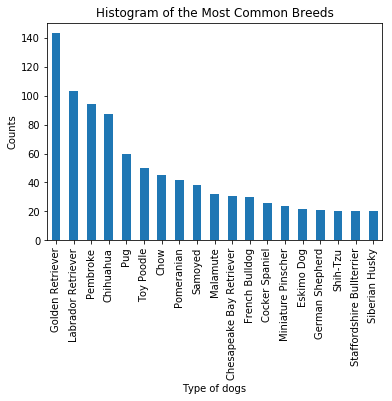

In [47]:
df_dog_type_pred = df_twitter_2.groupby('dog_type_pred').filter(lambda x: len(x) >= 20)

df_dog_type_pred['dog_type_pred'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the Most Common Breeds')
plt.xlabel('Type of dogs')
plt.ylabel('Counts');

#### Insights and Visualizations (2):

Retweets and Ratings Correlation 

There is no correlation between rating and retweets. The highest ratings do not receive the most retweets.

Text(0.5,1,'Retweet Counts by Ratings Scatter Plot')

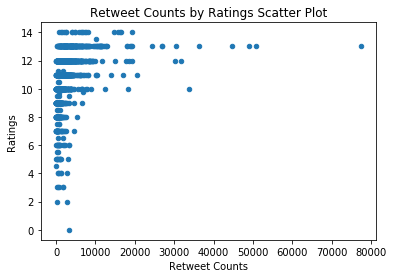

In [48]:
df_twitter_2.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

In [49]:
df_twitter_2[['retweet_count', 'rating']].corr(method='pearson')

,retweet_count,rating
retweet_count,1.000000,0.313361
rating,0.313361,1.000000


#### Insights and Visualizations (3):

Different Stages of Dogs:

So puppers are getting much lower rates than the other dog types. Their median is lower and they have low outliers. And puppo is having highest mean ratings here.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


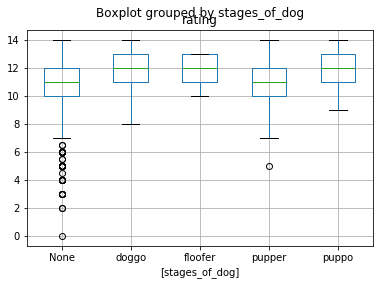

In [50]:
df_twitter_2.boxplot(column=['rating'], by=['stages_of_dog'])

In [51]:
df_twitter_2.groupby('stages_of_dog')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
stages_of_dog,,,,,,,,
None,1374.0,10.711555,1.841713,0.0,10.0,11.0,12.0,14.0
doggo,51.0,11.862745,1.385924,8.0,11.0,12.0,13.0,14.0
floofer,8.0,11.875000,1.125992,10.0,11.0,12.0,13.0,13.0
pupper,171.0,10.829064,1.477929,5.0,10.0,11.0,12.0,14.0
puppo,21.0,12.000000,1.341641,9.0,11.0,12.0,13.0,14.0


#### Insights and Visualizations (4):

Highest and Lowest ratings by type of dogs,

* Bouvier Des Flandres -  13.000000 - Highest
* Japanese Spaniel   -    5.000000 - Lowest

In [52]:
df_dog_type_pred_mean = df_twitter_2.groupby('dog_type_pred').mean()
df_dog_type_pred_mean.head()

,tweet_id,day,month,year,rating_numerator,rating_denominator,rating,dog_count,favorite_count,retweet_count,followers_count,friends_count
dog_type_pred,,,,,,,,,,,,
Afghan Hound,8.095999e+17,16.000000,6.00,2016.500000,8.000000,10.0,8.000000,1.000000,11911.000000,3493.500000,6.882834e+06,8.0
Airedale,7.184489e+17,15.916667,8.75,2015.583333,9.833333,10.0,9.833333,1.083333,5162.083333,1349.083333,6.882888e+06,8.0
American Staffordshire Terrier,7.597284e+17,15.000000,5.25,2016.187500,10.312500,10.0,10.312500,1.000000,9172.437500,2237.562500,6.882865e+06,8.0
Appenzeller,7.939334e+17,18.500000,4.50,2016.500000,11.000000,10.0,11.000000,1.000000,7186.500000,1413.000000,6.882860e+06,8.0
Australian Terrier,7.785921e+17,7.000000,3.50,2016.500000,11.500000,10.0,10.250000,1.500000,10894.000000,2978.500000,6.882860e+06,8.0


In [53]:
#Sorting according to ratings,

df_dog_type_pred_mean['rating'].sort_values()

dog_type_pred
Japanese Spaniel                5.000000
Afghan Hound                    8.000000
Soft-Coated Wheaten Terrier     8.800000
Scotch Terrier                  9.000000
Walker Hound                    9.000000
Tibetan Terrier                 9.250000
Dalmatian                       9.272727
Boston Bull                     9.416667
Welsh Springer Spaniel          9.500000
Saint Bernard                   9.500000
Dandie Dinmont                  9.571429
Norwich Terrier                 9.600000
Miniature Schnauzer             9.600000
Redbone                         9.666667
English Setter                  9.714286
Irish Terrier                   9.733333
Maltese Dog                     9.736842
Rhodesian Ridgeback             9.750000
Scottish Deerhound              9.750000
Papillon                        9.833333
Airedale                        9.833333
Newfoundland                    9.857143
Mexican Hairless                9.857143
Miniature Poodle                9.875000
Mi